Installing libraries and system utilities:

%%capture: This is a magic command in Jupyter Notebooks that captures the output of the cell. It's used here to prevent the output from the installations from cluttering the notebook.

!pip install wandb: Installs the wandb library, which is short for Weights & Biases. It's a tool for experiment tracking, model optimization, and dataset versioning in machine learning projects.

!apt-get install poppler-utils: Installs poppler-utils on the system, a utility for rendering PDFs, which is used by some Python libraries to process PDF files.
!pip install pdf2image: Installs the pdf2image library, which converts PDF files into images.

!pip install flashtorch: Installs the flashtorch library, which is used for visualizing feature maps and understanding neural networks within PyTorch.

Importing libraries:

import requests: Imports the requests library, which allows you to send HTTP requests easily in Python. This could be used to fetch data from the internet.

from pdf2image import convert_from_path: Specifically imports the convert_from_path function from the pdf2image library, which will be used to convert PDF files located at a specific path to images.

import matplotlib.pyplot as plt: Imports pyplot from matplotlib, a popular plotting library in Python, typically used for creating visualizations such as graphs and charts.

import numpy as np: Imports the numpy library, which is fundamental for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

import torch: Imports PyTorch, a deep learning library widely used for applications such as computer vision and natural language processing.
import requests: This line is redundant as requests was already imported earlier.

from torchvision import *: Imports everything from the torchvision library, which provides tools and datasets for working with images for deep learning.

from torchvision.models import *: Imports all the pre-trained models from the torchvision.models submodule, allowing access to models like ResNet, AlexNet, etc., which are pre-trained on datasets like ImageNet.

import wandb as wb: Imports the wandb library and renames it as wb for ease of use in the code. This is used for logging and tracking machine learning experiments, integrating with PyTorch to track metrics and outputs.

This script prepares an environment suitable for image processing and machine learning tasks, especially those that require handling images from PDF files or require model visualization and experiment tracking.

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# This line checks if a CUDA-compatible GPU is available for PyTorch to use.
# If a GPU is available, it sets device to use the GPU (cuda:0); otherwise, it defaults to using the CPU.
# This helps in optimizing computation speed, particularly for deep learning tasks.

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

# Converts the input data into a PyTorch tensor that supports gradient calculations (useful for training neural networks), ensuring the data is placed on the correct device (GPU or CPU).

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

# Similar to the GPU function but creates a tensor that does not require gradient calculations, typically used for data that won't be modified, like model inputs during inference.

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

# This function uses Matplotlib to plot an image. It turns off the axes for a cleaner look and sets the image color map to grayscale. The figure size is fixed to 5x5 inches.

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

# Constructs a URL to download a specific Google Slide as a PDF. It parses the original slide URL to get the necessary identifiers and constructs a new URL for downloading.

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

# Uses the URL from get_google_slide to download the slide as a PDF and then uses pdf2image to convert the PDF to an image with a resolution of 500 DPI.

def load(image, size=224):    # size=224 crops image
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor

# This function prepares an image for input into a neural network:
# It resizes and crops the image to a standard size (224x224 pixels, commonly used for models trained on ImageNet).
# Converts the image to a PyTorch tensor.
# Normalizes the image tensor using predefined means and standard deviations (common practice to match the preprocessing used during the training of models).
# Moves the tensor to the appropriate device (GPU or CPU) and enables gradient calculations.


# Overall, this code snippet is well-suited for handling image data extraction from online sources like Google Slides, transforming them for neural network input, and visualizing them.
#  It's designed for integration into a workflow where images are processed and analyzed, potentially in a machine learning or data visualization context.


This snippet of code involves loading class labels from a JSON file hosted online and setting up a pre-trained neural network model (specifically, AlexNet) for inference. Here's a breakdown of what each part does:

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

# This line downloads a JSON file containing class labels from a specified URL using the requests library.
# The JSON object typically maps class indices to their corresponding label names (e.g., "0": "cat", "1": "dog").
# The JSON data is parsed into a Python dictionary where keys are converted from strings to integers.
# This conversion is important because class labels in model outputs are generally integer indices, and this allows for direct matching.

model = alexnet(weights='DEFAULT').to(device)
model.eval();

# lexnet(weights='DEFAULT'): This function loads a pre-trained AlexNet model. The weights='DEFAULT' argument specifies that the default pre-trained weights should be used.
# AlexNet is a well-known convolutional neural network that was one of the first deep models to significantly advance performance on the ImageNet dataset.
# .to(device): Moves the model to the appropriate device (CPU or GPU), ensuring that all computations are performed on the same device.
# model.eval(): Puts the model in evaluation mode. This is crucial for models with components like dropout or batch normalization, which behave differently during training vs. testing (inference).
# In evaluation mode, these components are set to behave consistently based on the learned parameters during training, without further adaptation.

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 38.3MB/s]


The overall setup of this code is aimed at performing inference with a pre-trained model on new data, using the downloaded labels for interpretation of the model's output. This setup is typical in scenarios where you want to use a deep learning model to classify images according to the learned categories from the model's training phase, leveraging a pre-trained model to avoid the need for training from scratch.

In [7]:
url = "https://docs.google.com/presentation/d/1D7mEvdhJ5gpl2IEcZoW5eGg5wENB7TVXLF4bXg5YePU/edit#slide=id.g2b78f0cdd83_0_0"

# Change URL to deck used

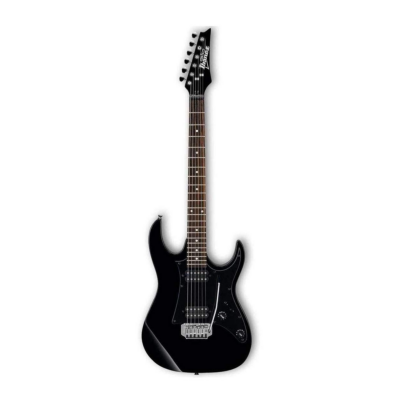

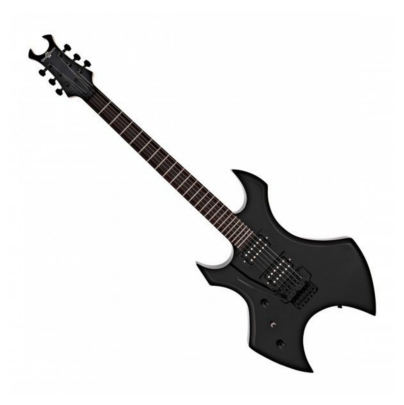

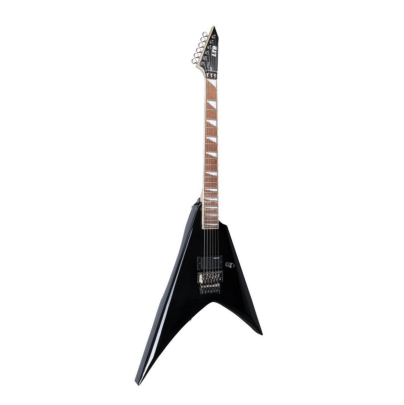

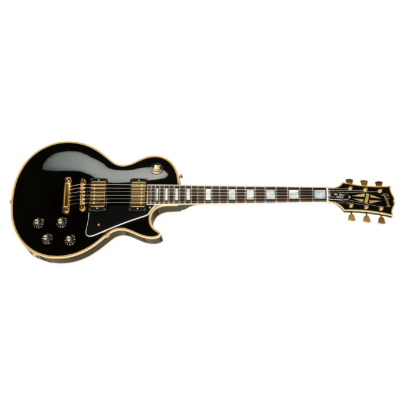

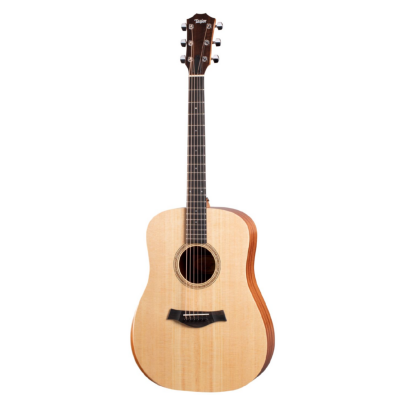

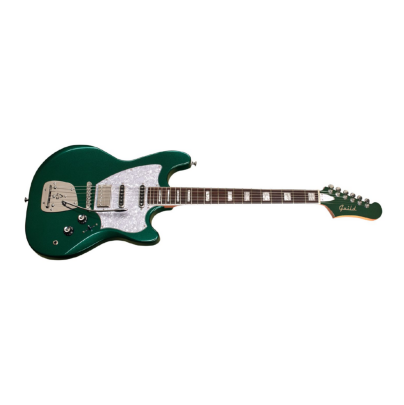

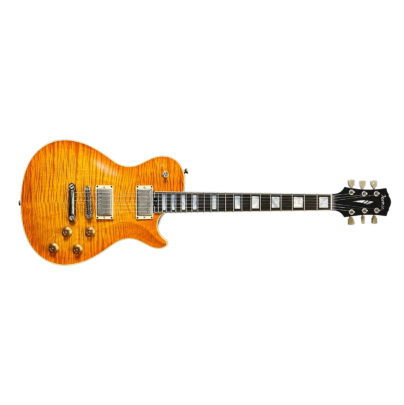

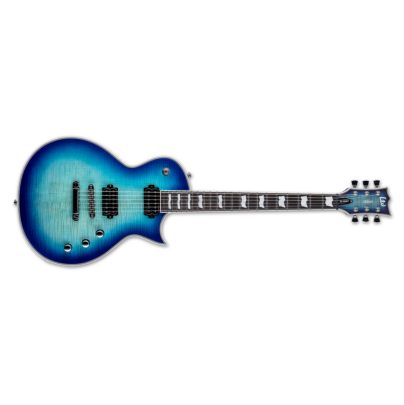

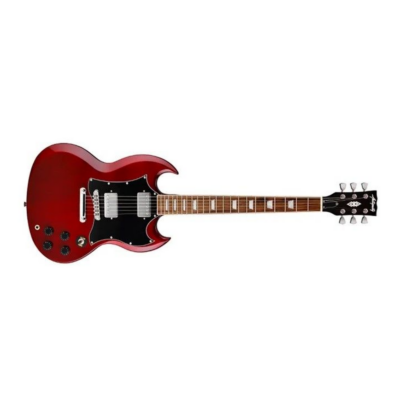

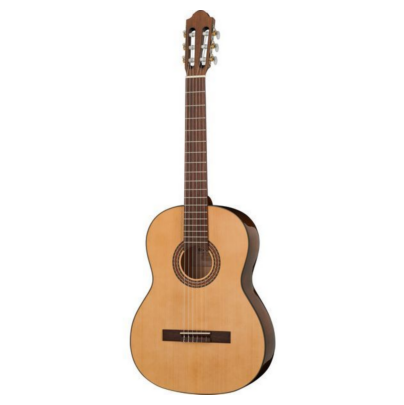

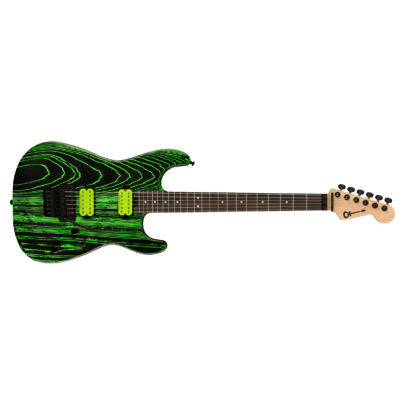

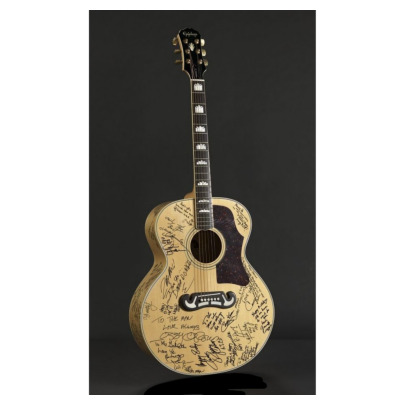

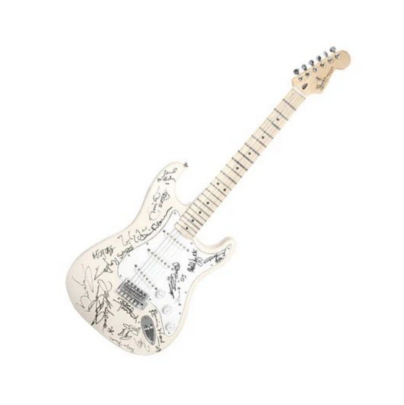

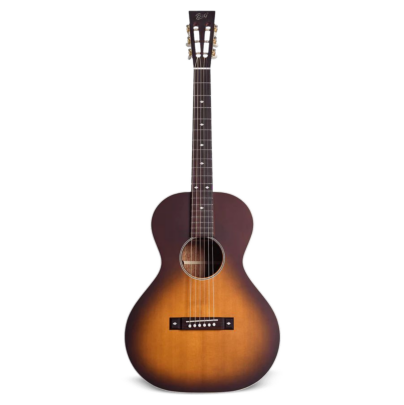

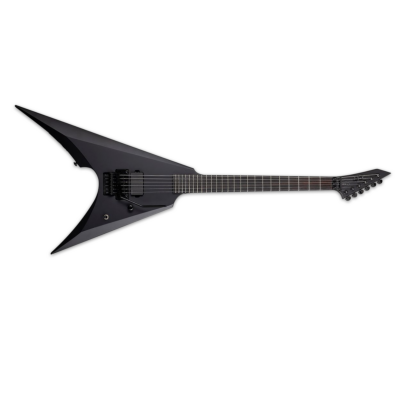

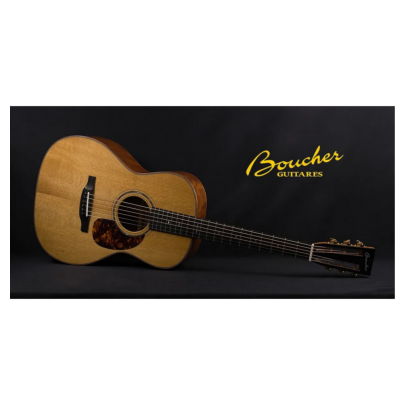

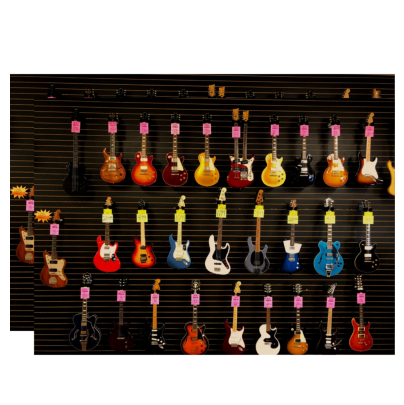

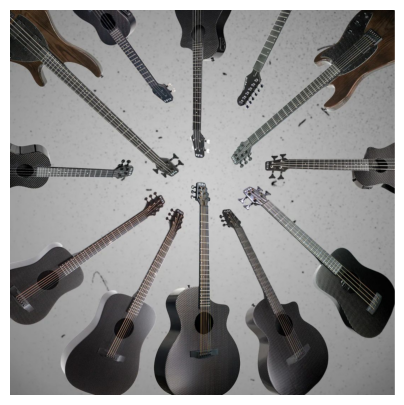

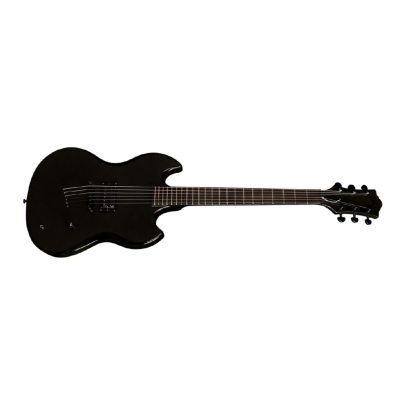

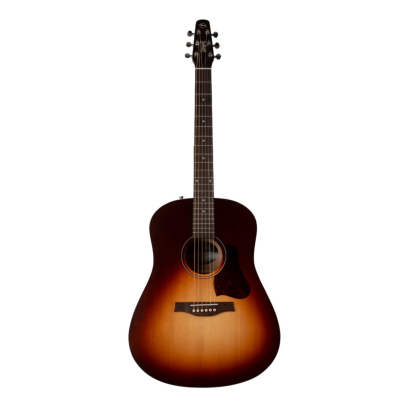

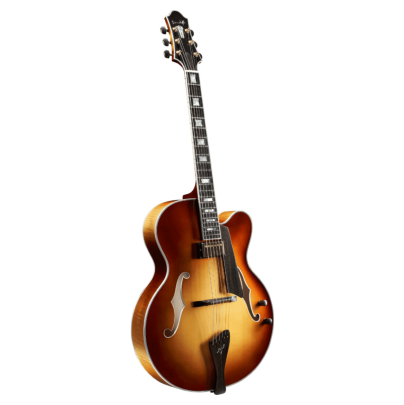

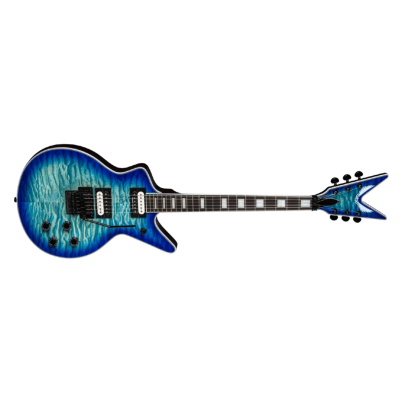

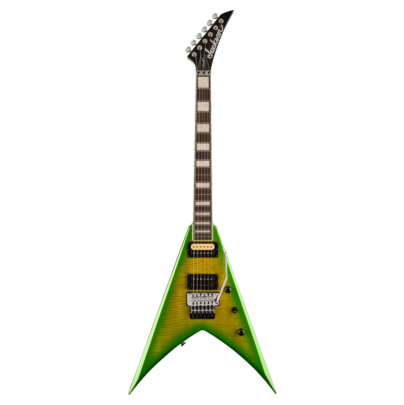

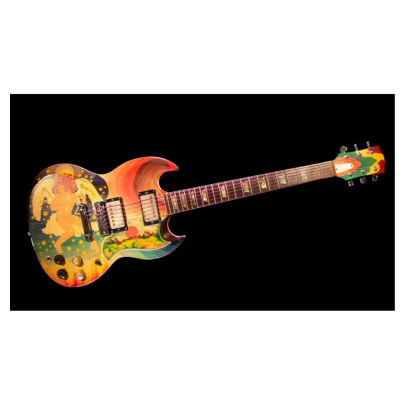

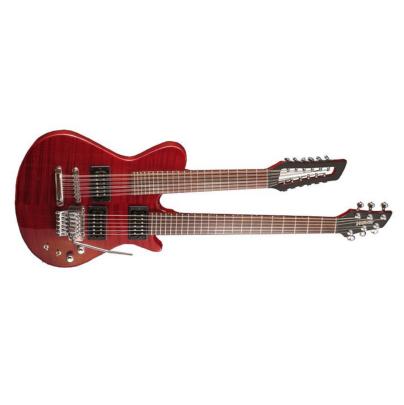

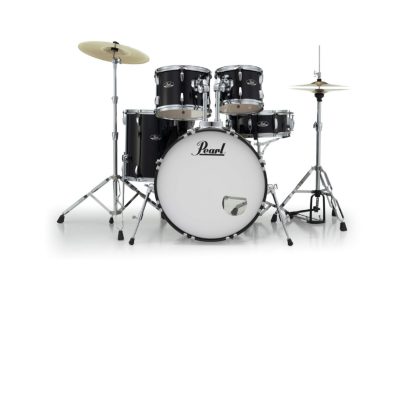

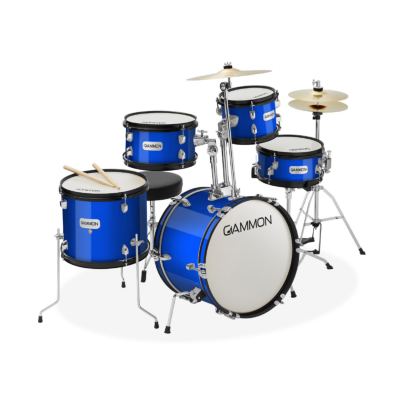

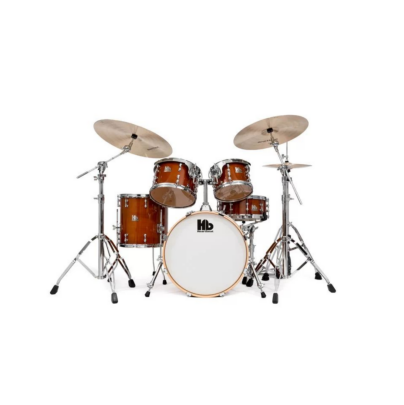

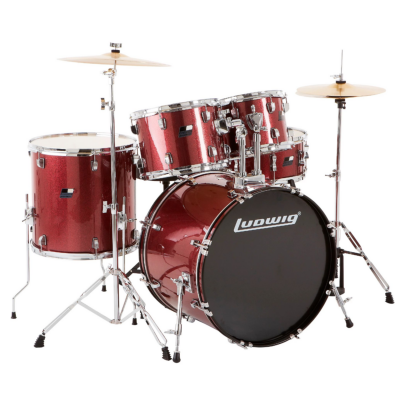

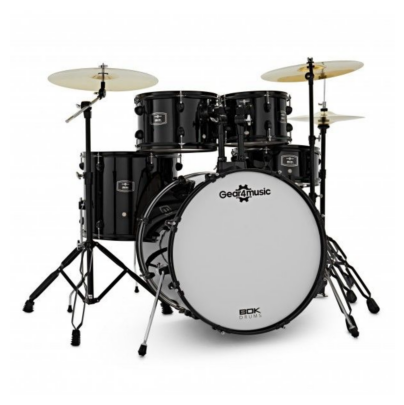

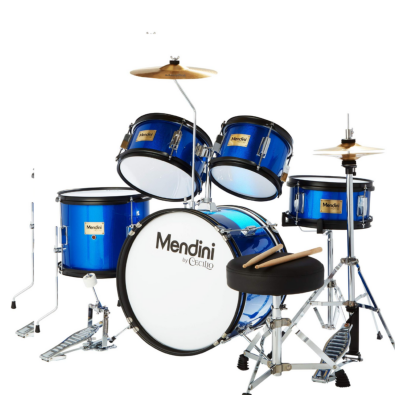

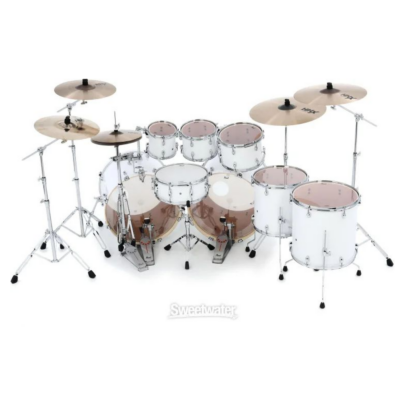

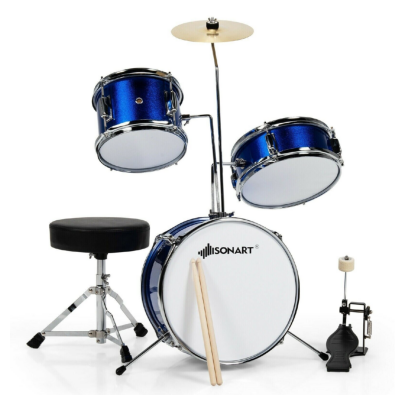

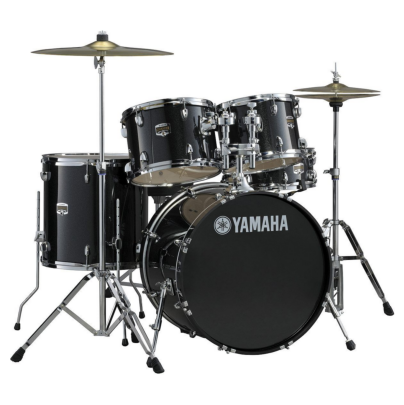

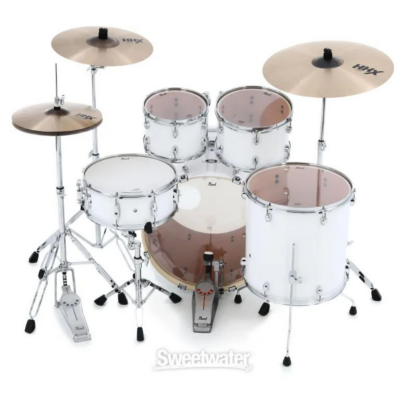

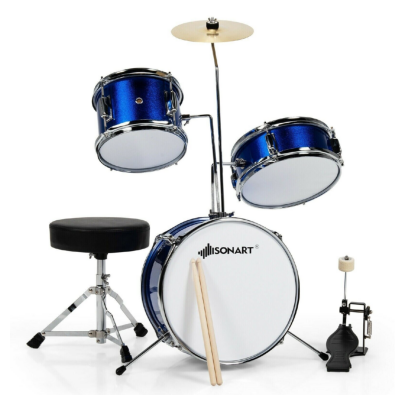

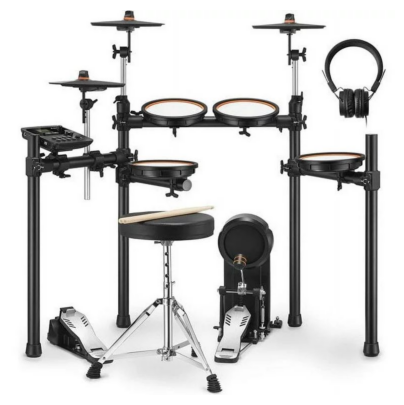

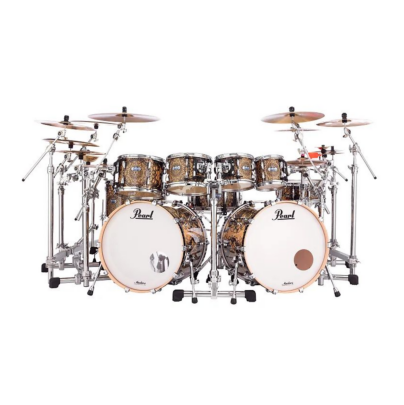

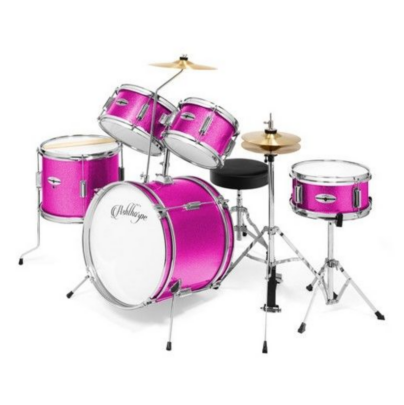

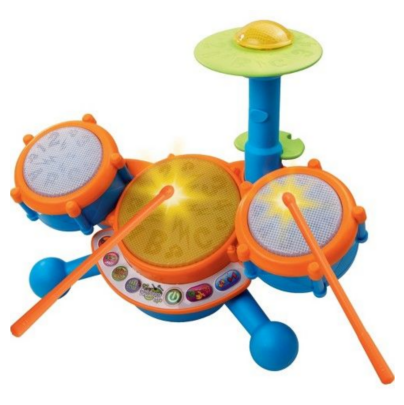

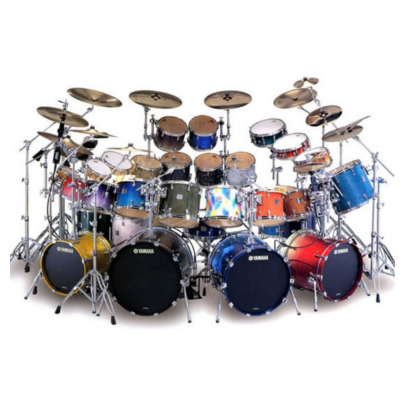

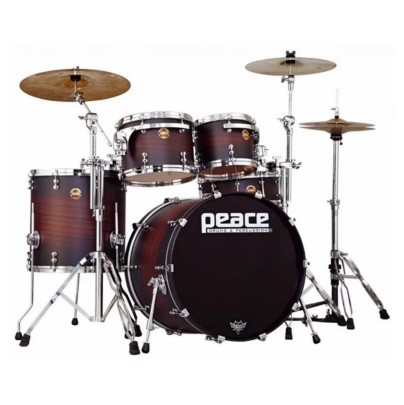

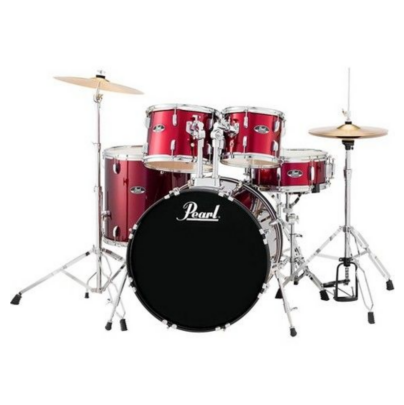

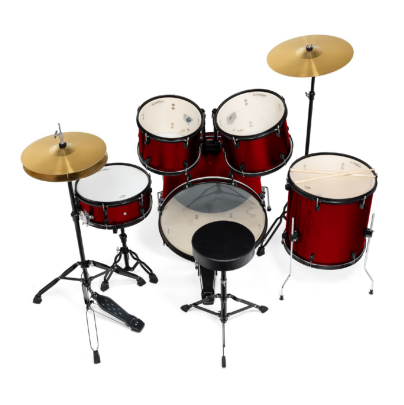

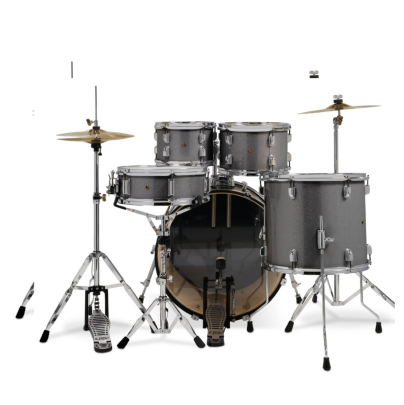

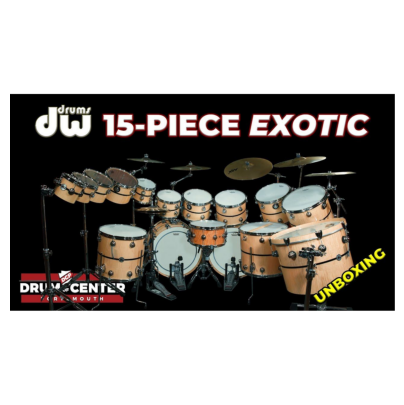

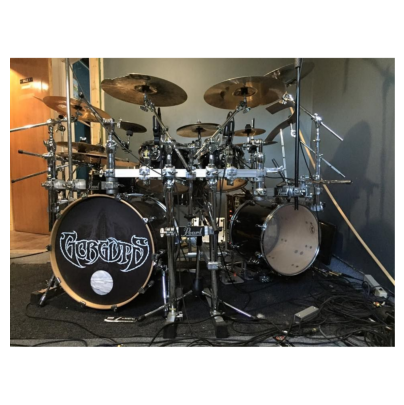

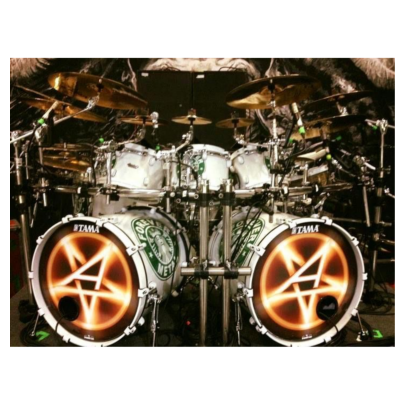

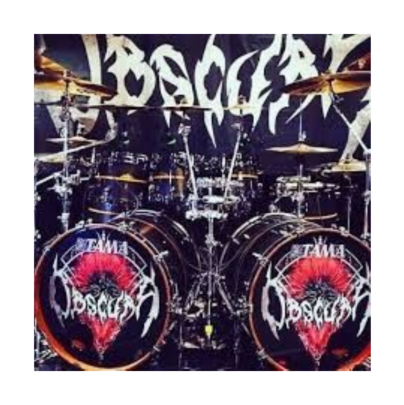

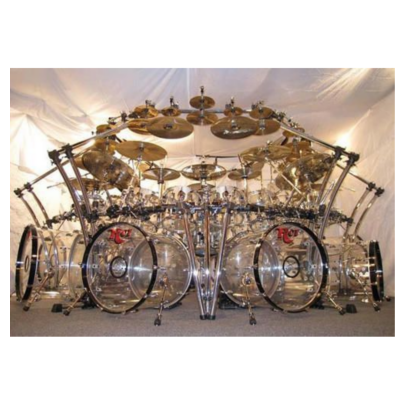

In [8]:
images = []

for image in get_slides(url):

  # Calls the previously defined get_slides function, which downloads the presentation as a PDF, converts each slide in the PDF to an image, and returns a list of these images.

    plot(image)

    # Each slide image is displayed using the plot function, which uses Matplotlib to render the image in grayscale.

    images.append(load(image))


    # Each image is then processed through the load function to convert it into a normalized tensor, resized and cropped to a common dimension, and prepared for input into a neural network model.
    # The tensor is moved to the appropriate device (CPU or GPU), and gradient tracking is enabled (which may or may not be necessary depending on whether further processing like fine-tuning is intended).

images = torch.vstack(images)

# After processing all slides, the list of tensors is combined into a single tensor using torch.vstack.
# This operation stacks the tensors vertically (along a new dimension at the beginning), creating a batch of tensors that can be inputted to the neural network in one go.

In [9]:
images.shape

# [(50,3, 224,224)]
# 50 images, 3 color channels, 224 x 224 hxw
#cropped from 256 to 224

# Before feeding the images into the model, you check their shape to ensure they're correctly formatted.
# The expected shape is (50, 3, 224, 224), representing a batch of 50 images, each with 3 color channels (RGB), and each image is 224x224 pixels in size.
# This confirms that the preprocessing (resize, crop, etc.) was correctly applied.

torch.Size([50, 3, 224, 224])

In [10]:
model(images)

# model(images): This line feeds the batch of images into the AlexNet model, which is currently in evaluation mode.
# The model processes all images and outputs their class predictions in the form of logits or raw prediction scores for each class.

tensor([[-2.3636, -3.2433, -4.2830,  ..., -4.1979,  0.1462,  1.6447],
        [-1.9157, -3.8593,  0.8246,  ..., -4.2007, -0.8379,  1.0665],
        [-3.6620, -0.8713,  1.4826,  ..., -4.8247, -0.5566, -0.4318],
        ...,
        [-4.1745, -1.8012, -1.0154,  ...,  0.0542,  2.0854,  1.8663],
        [-2.7175, -1.0029, -2.4744,  ..., -1.4191, -1.1011,  2.3105],
        [-4.1138, -2.0978, -4.2540,  ..., -3.2410,  3.2983,  0.8087]],
       grad_fn=<AddmmBackward0>)

In [11]:
y = model(images)

# The output y from the model is stored in a variable. Running this line again is redundant unless it's for a demonstration or testing.

In [12]:
y.shape

# This checks the shape of the output tensor y, which should have the dimensions [50, N] where N is the number of classes the model can predict.
# This structure indicates that there are 50 predictions (one for each image), and each prediction consists of a score for each class.

torch.Size([50, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy()

# torch.argmax(y, 1): This function finds the indices of the maximum values along dimension 1 (class scores for each image), which correspond to the predicted class indices.
# .cpu().numpy(): Moves the tensor back to the CPU if it isn't already (necessary if the tensor is on a GPU) and converts it to a NumPy array for easy use outside of PyTorch.

In [14]:
for i in list(guesses):
    print(labels[i])

# This loop iterates through each item in the guesses array, which contains the predicted class indices for each image.
# It uses these indices to access and print the corresponding class labels from the labels dictionary.

electric guitar
electric guitar
missile
corkscrew, bottle screw
acoustic guitar
screw
chain saw, chainsaw
screw
hook, claw
acoustic guitar
chain saw, chainsaw
acoustic guitar
chain
acoustic guitar
assault rifle, assault gun
can opener, tin opener
lipstick, lip rouge
hammer
microphone, mike
acoustic guitar
acoustic guitar
hook, claw
electric guitar
pencil box, pencil case
electric guitar
drum, membranophone, tympan
drum, membranophone, tympan
drum, membranophone, tympan
drum, membranophone, tympan
drum, membranophone, tympan
scale, weighing machine
pencil sharpener
barber chair
drum, membranophone, tympan
drum, membranophone, tympan
barber chair
desk
drum, membranophone, tympan
hair slide
oxygen mask
hair slide
drum, membranophone, tympan
drum, membranophone, tympan
drum, membranophone, tympan
drum, membranophone, tympan
wallet, billfold, notecase, pocketbook
buckle
pretzel
wallet, billfold, notecase, pocketbook
chest


In [15]:
Y = np.zeros(50,)
Y[25:] = 1

# Y = np.zeros(50,): This line creates an array of 50 zeros. In a binary classification context, this can represent the negative class (e.g., class 0).
# Y[25:] = 1: This line assigns the value 1 to the second half of the array, representing the positive class (e.g., class 1).
# This could be used for testing the model's ability to distinguish between two classes in a controlled scenario.

In [16]:
Y

# Displays Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [18]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
X = y.detach().cpu().numpy()

# Converts the model outputs y (logits or activation values) to a NumPy array after detaching them from the computation graph
# (which is needed if the tensor requires gradient).
# This makes X usable for further non-PyTorch processing.

In [20]:
X.shape

# Displays shape of X

(50, 1000)

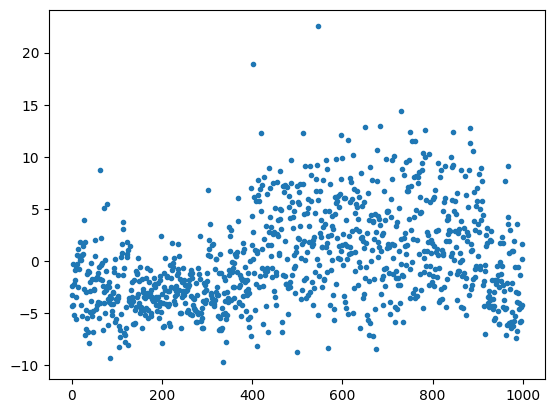

In [21]:
plt.plot(X[0],'.')

# Plots the prediction scores for the first image in the batch as a scatter plot. This helps visualize the distribution of scores across different classes.

(array([ 33., 234., 294., 215., 115.,  78.,  26.,   3.,   1.,   1.]),
 array([-9.75280094, -6.52649736, -3.30019379, -0.07389021,  3.15241337,
         6.37871695,  9.60502052, 12.83132362, 16.05762863, 19.28393173,
        22.51023483]),
 <BarContainer object of 10 artists>)

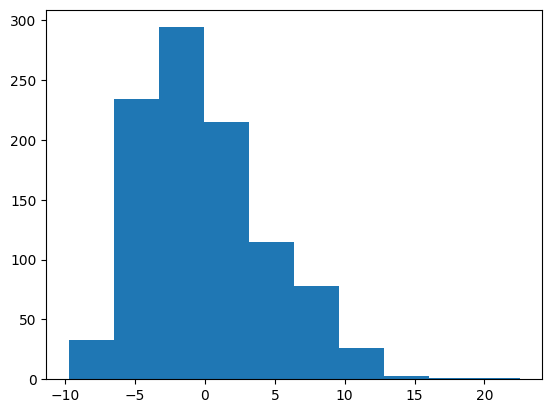

In [22]:
plt.hist(X[0])

# Creates a histogram of the prediction scores for the first image, providing another perspective on how the scores are distributed.

In [23]:
X = GPU_data(X)
Y = GPU_data(Y)

# These lines convert the arrays X and Y back into PyTorch tensors.
# Since they are being prepared potentially for use in training or evaluation within a PyTorch workflow, they are placed on the appropriate device (GPU or CPU as defined earlier),
# and no gradient is required for these operations (requires_grad=False).

## Softmax

This custom softmax function takes logits (x) as input and returns the softmax probabilities. It first stabilizes the input by subtracting the maximum logit value per batch (to prevent numerical overflow), then computes the exponential of the adjusted logits, and finally normalizes these values by the sum of the exponentials for each sample in the batch. This results in a probability distribution over classes for each input.

In [24]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

## Cross Entropy

This function computes the cross-entropy loss between predictions (outputs) and true labels (labels). It applies the softmax function to the outputs to get a probability distribution, then uses these probabilities to calculate the logarithm. The function collects the log probabilities corresponding to the true class labels (using advanced indexing) and averages the negative sum across the batch for the loss.

In [25]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

## Randn Trunc

Generates random numbers from a truncated normal distribution. The distribution is centered at mu with standard deviation sigma, truncated at µ±2σ. This is often used for initializing weights in neural networks to avoid large weights that could lead to instability.

In [26]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

## Truncated Normal

Implements a form of the Box-Muller transformation to generate random numbers following a normal distribution, specifically a form of truncated normal distribution by bounding the uniform random numbers used in the transformation.

In [27]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

## Accuracy

Calculates the accuracy of predictions (out) by comparing the predicted labels (found by taking the argmax of out) with the true labels (y). The result is the proportion of correct predictions over the total number of predictions. The use of torch.no_grad() indicates that gradient calculations are not necessary for this operation, which is common during evaluation to save memory and computation.

In [28]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [29]:
X.shape

# This line is intended to check the shape of the dataset X, presumably before entering the training loop. It's useful for debugging or ensuring data dimensions are expected.

torch.Size([50, 1000])

## Get Batch

This function fetches a batch of data for training or testing. It randomly selects a starting index r and slices b samples from the datasets X or X_test, and their corresponding labels Y or Y_test.

In [30]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

## Model

A simple linear model that performs a matrix multiplication (@) between input x and weights w[0]. It’s assumed that w is a list containing at least one tensor of weights.

In [31]:
def model(x,w):

    return x@w[0]

## Make Plots

This function computes the training accuracy using the previously defined acc and model functions and logs it to W&B. Commented out lines indicate that testing accuracy computation was considered but not implemented.

In [32]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [33]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

# Initializes a W&B project for tracking experiments. Configuration parameters are accessed through c, which is set up with training hyperparameters.

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

# Set learning rate, batch size, number of epochs, and initializes the weights w using a GPU-enabled truncated normal distribution.

optimizer = torch.optim.Adam(w, lr=c.h)

# Configures the Adam optimizer with the learning rate from the config and the weights as parameters.

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()

# Executes the training process for the specified number of epochs. Each iteration retrieves a batch of data, computes the cross-entropy loss
# after applying softmax to the model’s outputs, performs backpropagation, and updates the weights.
# Loss is logged to W&B, and make_plots is called each iteration (though it currently only logs training accuracy).


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-bd581843d2fe>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
